In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df_cancer = pd.read_csv(r"C:\Users\rajes\Downloads\Cancer_10.csv")
df_db = pd.read_csv(r'C:\Users\rajes\Downloads\Diabeties_10.csv')
df_db = df_db.iloc[:len(df_cancer)]
df = pd.concat([df_db,df_cancer],axis =1)
len(df)

569

In [159]:
df.isnull().sum()
df.duplicated().sum()

0

In [160]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diagnosis,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,148,72,35,0,33.6,0.627,50,1,M,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,85,66,29,0,26.6,0.351,31,0,M,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,8,183,64,0,0,23.3,0.672,32,1,M,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Diabeties

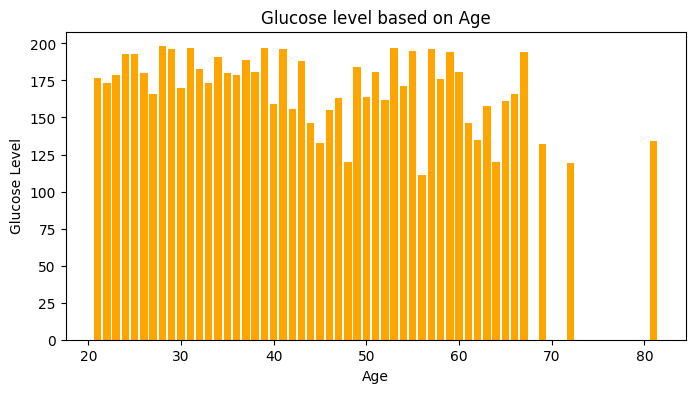

In [161]:
plt.figure(figsize=(8,4))
plt.bar(df_db['Age'],df_db['Glucose'],color = 'orange')
plt.title('Glucose level based on Age')
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

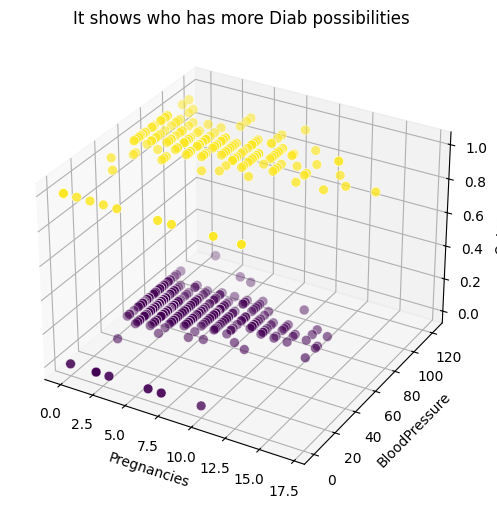

In [162]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df['Pregnancies'],df['BloodPressure'],df['Outcome'],c = df['Outcome'], cmap = 'viridis', s =50 , lw = 0.5, edgecolors = 'w')
ax.set_title('It shows who has more Diab possibilities')
ax.set_xlabel('Pregnancies')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Outcome')

plt.show()

# Cancer

In [163]:
df_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [164]:
columns_of_mean = ['radius_mean', 'texture_mean', 'perimeter_mean',
                       'area_mean', 'smoothness_mean', 'compactness_mean',
                       'concavity_mean', 'concave points_mean',
                       'symmetry_mean', 'fractal_dimension_mean'
                   ]

columns_of_se = [
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se']

columns_of_worst =['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

grouped_mean = df_cancer.groupby('radius_mean')[columns_of_mean].mean()
grouped_se = df_cancer.groupby('radius_se')[columns_of_se].mean()
grouped_worst = df_cancer.groupby('radius_worst')[columns_of_worst].mean()


In [165]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

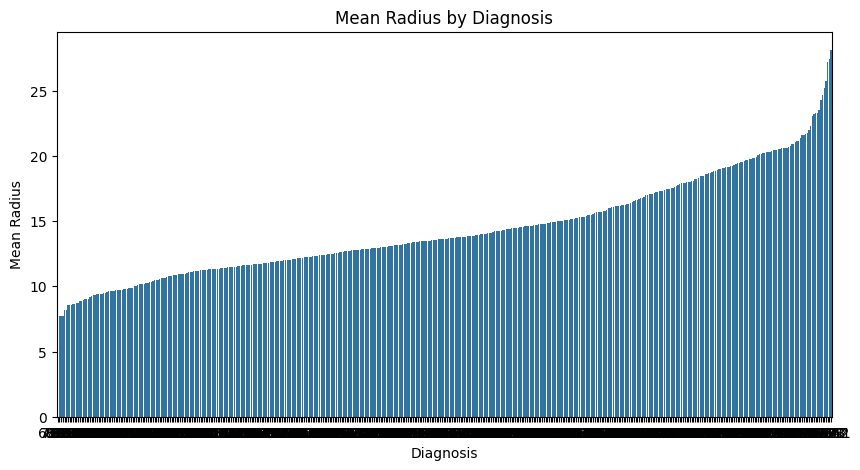

In [166]:
plt.figure(figsize= (10,5))
sns.barplot(x=grouped_mean.index, y='radius_mean', data=grouped_mean)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

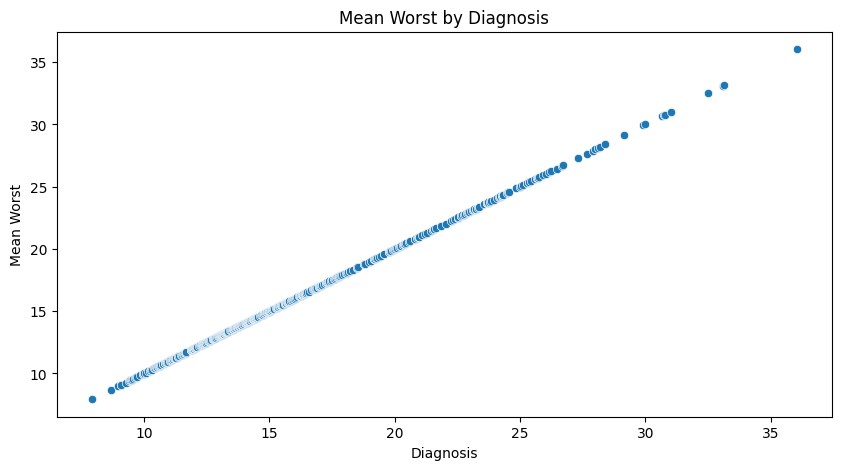

In [167]:
plt.figure(figsize= (10,5))
sns.scatterplot(x=grouped_worst.index, y='radius_worst', data=grouped_worst)
plt.title('Mean Worst by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Worst')
plt.show()

In [168]:
df_cancer[df_cancer['diagnosis'] == 'M'].head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [169]:
# total_means_worst = grouped_worst.sum(axis=1)

# plt.figure(figsize=(10, 5))
# plt.pie(total_means_worst, labels=total_means_worst.index, startangle=140, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
# plt.title('Total Mean of Worst Features by Diagnosis')
# plt.show()

In [170]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diagnosis,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,148,72,35,0,33.6,0.627,50,1,M,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,85,66,29,0,26.6,0.351,31,0,M,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,8,183,64,0,0,23.3,0.672,32,1,M,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,89,66,23,94,28.1,0.167,21,0,M,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,137,40,35,168,43.1,2.288,33,1,M,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [172]:

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('rfe', RFE(estimator=clf, n_features_to_select=3)),
    ('clf', clf)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
acc_per  = accuracy * 100
print(f"Accuracy: {acc_per:.3f}")

rfe = pipeline.named_steps['rfe']
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")
len(X)

Accuracy: 94.737
Selected features: Index(['concave points_mean', 'perimeter_worst', 'concave points_worst'], dtype='object')


569

In [173]:
X_selected = df[['Glucose','Insulin','Outcome','concave points_mean', 'perimeter_worst',
       'concave points_worst']]
X_selected.head(3)
len(X_selected)

569

In [174]:
y_new = df['diagnosis']
# y_new = y_new.iloc[:len(X_selected)]
y.tail(3)
# len(y)

566    M
567    M
568    B
Name: diagnosis, dtype: object

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report



X_selected = df[['Glucose','Insulin','Outcome','concave points_mean', 'perimeter_worst',
       'concave points_worst']]
y_new = df['diagnosis']

training_X,testing_X,training_y,testing_y = train_test_split(X_selected,y_new,test_size = 0.2, random_state = 42)


rf_clf = RandomForestClassifier(random_state =42)


rf_clf.fit(training_X,training_y)


y_pred = rf_clf.predict(testing_X)

accuracy = accuracy_score(testing_y, y_pred)
precision = precision_score(testing_y, y_pred, pos_label='M')  
recall = recall_score(testing_y, y_pred, pos_label='M')
f1 = f1_score(testing_y, y_pred, pos_label='M')

conf_matrix = confusion_matrix(testing_y, y_pred)
class_report = classification_report(testing_y, y_pred)

def patient_data(data):
    pred = rf_clf.predict(data)
    return(pred)

datas = pd.DataFrame({
    'Glucose': [154],
    'Insulin': [126],
    'Outcome': [0],
    'concave points_mean': [0.00000],
    'perimeter_worst': [59.16],
    'concave points_worst': [0.05200]
})

prediction = patient_data(datas)
prediction

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
acc_per  = accuracy * 100
print(f"Accuracy: {acc_per:.3f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

prediction

Accuracy: 0.95
Precision: 0.95
Recall: 0.91
F1-score: 0.93
Accuracy: 94.737

Confusion Matrix:
[[69  2]
 [ 4 39]]

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



array(['B'], dtype=object)

# ROC Curve

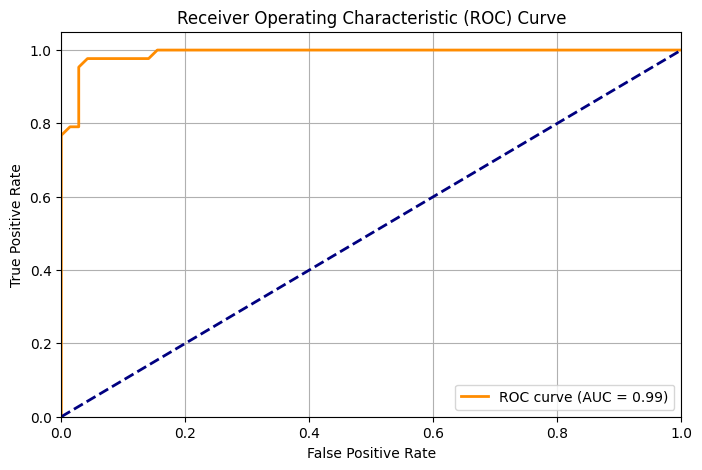

In [176]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_clf.predict_proba(testing_X)[:, 1]  


fpr, tpr, thresholds = roc_curve(testing_y, y_pred_proba, pos_label='M')
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()